<a href="https://www.kaggle.com/code/edrickkesuma/100-score-pawpularity-eda-w-fastai?scriptVersionId=91266004" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Pawpularity - What is up with all the 100s? 

Here's a notebook for anyone curious about what pictures are in those 100-Pawpularity scores.

Also they're just eye candy to look at :)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.vision.all import *

In [2]:
another_df = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
another_df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


In [3]:
another_df['path'] = another_df['Id'].apply(lambda x: '../input/petfinder2-cropped-dataset/crop/' + x + '.jpg')
another_df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,path
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,../input/petfinder2-cropped-dataset/crop/0007de18844b0dbbb5e1f607da0606e0.jpg
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,../input/petfinder2-cropped-dataset/crop/0009c66b9439883ba2750fb825e1d7db.jpg
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,../input/petfinder2-cropped-dataset/crop/0013fd999caf9a3efe1352ca1b0d937e.jpg
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,../input/petfinder2-cropped-dataset/crop/0018df346ac9c1d8413cfcc888ca8246.jpg
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,../input/petfinder2-cropped-dataset/crop/001dc955e10590d3ca4673f034feeef2.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15,../input/petfinder2-cropped-dataset/crop/ffbfa0383c34dc513c95560d6e1fdb57.jpg
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70,../input/petfinder2-cropped-dataset/crop/ffcc8532d76436fc79e50eb2e5238e45.jpg
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20,../input/petfinder2-cropped-dataset/crop/ffdf2e8673a1da6fb80342fa3b119a20.jpg
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20,../input/petfinder2-cropped-dataset/crop/fff19e2ce11718548fa1c5d039a5192a.jpg


In [4]:
my_df = pd.read_csv('../input/oof-and-train/train_with_oof.csv')
my_df.head(3)

,Unnamed: 0,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,Breed,kfold,path,norm_score,oof
0,0,0,1,1,1,0,0,0,0,1,1,0,0,21,1,2,../input/petfinder-pawpularity-score/train/c59a96f9152b25886f8506fbe323a30e.jpg,0.21,0.251832
1,1,0,1,1,0,0,0,0,0,0,0,0,0,48,1,0,../input/petfinder-pawpularity-score/train/cc867dc24fde59240f16929193b8d8d0.jpg,0.48,0.364551
2,2,0,1,1,1,0,0,0,0,1,1,0,0,31,1,4,../input/petfinder-pawpularity-score/train/653101d10a09f9c84303e28e60d5431e.jpg,0.31,0.359364


## OOF vs Pawpularity Viz

Notice the huge difference between OOF predictions and Pawpularity. 

In [5]:
my_df['oof'] = my_df['oof'] * 100

<AxesSubplot:xlabel='oof', ylabel='Pawpularity'>

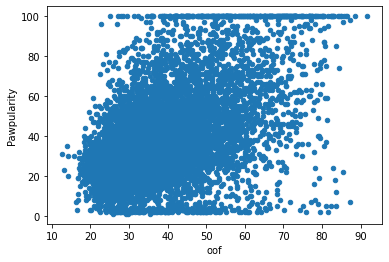

In [6]:
# Credit for oof vs pawpularity viz: https://www.kaggle.com/joatom/petfinder2021-fastai-train
# Ideally, we want something closer to a diagonal line here (predictions align with labels)
my_df[['oof','Pawpularity']].plot.scatter('oof','Pawpularity')

array([[<AxesSubplot:title={'center':'oof'}>,
        <AxesSubplot:title={'center':'Pawpularity'}>]], dtype=object)

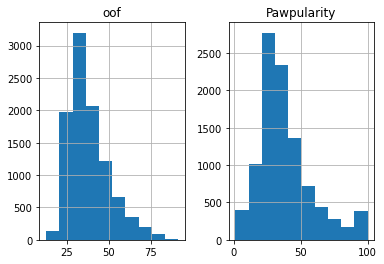

In [7]:
# Sudden large spike in labeled 100 values
# Predictions group around the mean and cannot make more confident predictions
my_df[['oof','Pawpularity']].hist()

## Miscellaneous stats on the 100 scores

In [8]:
# There are 288 pictures with Pawpularity score of 100
best_score_indexes = my_df.index[my_df['Pawpularity'] == 100].to_list()
len(best_score_indexes)

288

In [9]:
best_df = my_df.iloc[best_score_indexes]
best_df.head(3)

,Unnamed: 0,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,Breed,kfold,path,norm_score,oof
6,6,1,1,1,1,0,0,0,0,0,0,0,0,100,1,1,../input/petfinder-pawpularity-score/train/cf1609a2c7f055bfdce31bd20cb507c6.jpg,1.0,51.194537
51,51,0,1,1,1,0,0,1,0,0,0,0,0,100,0,4,../input/petfinder-pawpularity-score/train/ab57d93616f0476acb48de353bfea440.jpg,1.0,55.537490
99,99,0,1,1,1,0,0,0,0,0,0,0,0,100,1,4,../input/petfinder-pawpularity-score/train/6828b2300233cbf1c95317ed36b11b80.jpg,1.0,69.966495


In [10]:
# A custom breed column created with yolov5. Credit: https://www.kaggle.com/eduardofv/cat-or-dog-petfinder-pawpularity-competition
# It seems dogs are more likely than cats to get the 100-score
best_df['Breed'].map({0:'Dog', 1:'Cat', 2:'Neither'}).value_counts()

Dog        166
Cat        109
Neither     13
Name: Breed, dtype: int64

## Show us the pictures

In [11]:
unknown_breed_indexes = my_df.index[my_df['Breed'] == 2].to_list()
test_df = my_df.iloc[unknown_breed_indexes]
test_df

,Unnamed: 0,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,Breed,kfold,path,norm_score,oof
33,33,0,0,1,1,0,1,0,0,0,0,0,1,41,2,4,../input/petfinder-pawpularity-score/train/3448aa112712cb3cb3eb8323e1fab5a7.jpg,0.41,29.067874
44,44,0,1,1,1,0,0,1,0,0,0,0,0,32,2,3,../input/petfinder-pawpularity-score/train/e6953bb6f5932c28d0c160c336539a4d.jpg,0.32,37.524850
55,55,0,1,1,1,0,0,0,0,0,0,0,0,31,2,3,../input/petfinder-pawpularity-score/train/56beef90dcb2be968173a1e4f3c8f9e4.jpg,0.31,26.397870
85,85,0,1,1,1,0,0,0,0,0,0,0,0,25,2,1,../input/petfinder-pawpularity-score/train/63c15328ac9a79daa51ca045b260ddaf.jpg,0.25,38.070140
88,88,1,1,1,1,0,0,0,0,0,0,0,0,20,2,0,../input/petfinder-pawpularity-score/train/69a1ba5d0796265909edc9d9644ac7d9.jpg,0.20,28.219620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9731,9731,0,1,1,1,0,0,0,0,0,0,0,0,24,2,1,../input/petfinder-pawpularity-score/train/1e4927134be64199979b6e0002115c19.jpg,0.24,33.862367
9824,9824,0,1,1,0,0,0,1,0,0,0,0,0,62,2,2,../input/petfinder-pawpularity-score/train/3549a4f097cd4e03ab1f0b3cc14c436a.jpg,0.62,59.930927
9846,9846,0,0,0,1,0,0,0,0,0,0,0,0,25,2,1,../input/petfinder-pawpularity-score/train/4f27ceb2baf1798ce4f14bd9a290a82c.jpg,0.25,44.140208
9859,9859,0,1,1,1,0,0,0,0,1,1,0,0,36,2,3,../input/petfinder-pawpularity-score/train/795d13dffddff5117508f9be34b4334b.jpg,0.36,32.444940


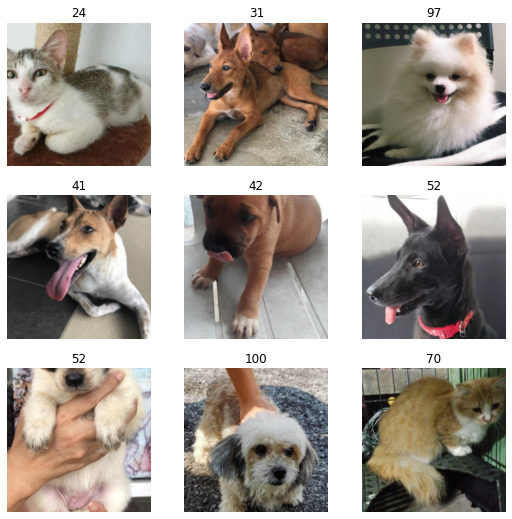

In [12]:
dls = ImageDataLoaders.from_df(another_df,
                              valid_pct=0.2,
                              seed=999,
                              fn_col='path',
                              label_col='Pawpularity',
                              bs=10,
                              item_tfms=Resize(224)
                              )
dls.show_batch()

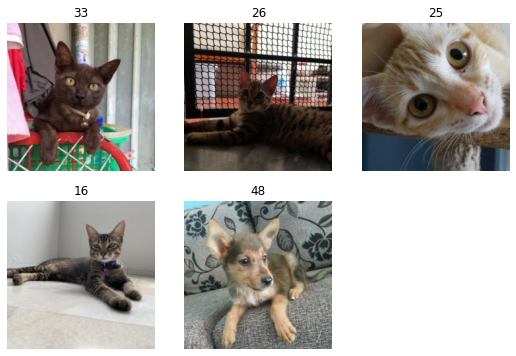

In [13]:
dls = ImageDataLoaders.from_df(test_df,
                              valid_pct=0.2,
                              seed=999,
                              fn_col='path',
                              label_col='Pawpularity',
                              bs=5,
                              item_tfms=Resize(224),
                              aug_tfms=setup_aug_tfms([Dihedral(p=1)])
                              )
dls.show_batch()

In [14]:
# Based on the fastai starter implementation: https://www.kaggle.com/tanlikesmath/petfinder-pawpularity-eda-fastai-starter
dls = ImageDataLoaders.from_df(best_df,
                              valid_pct=0.2,
                              seed=999,
                              fn_col='path',
                              label_col='Pawpularity',
                              item_tfms=Resize(224)
                              )

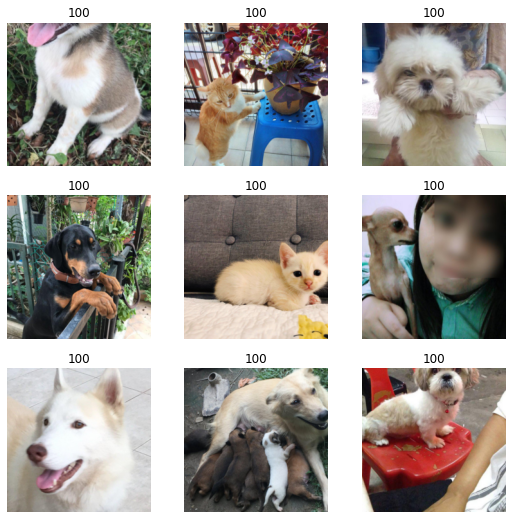

In [15]:
# Rerun this cell to show a new batch of cute pets :3
# My takeaway: pets with closeups and eyes clearly visible get better scores,
            # better methods of resizing could also help model to make better predictions
dls.show_batch()

Do leave any comments on personal takeaways or feedback. I'm fairly new to making EDA notebooks :)